In [67]:
# Auto-reload setup
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from scipy.signal import find_peaks

sys.path.append(os.path.abspath("../src"))
from plotting import plot_price_hour, plot_avg_hourly_prices

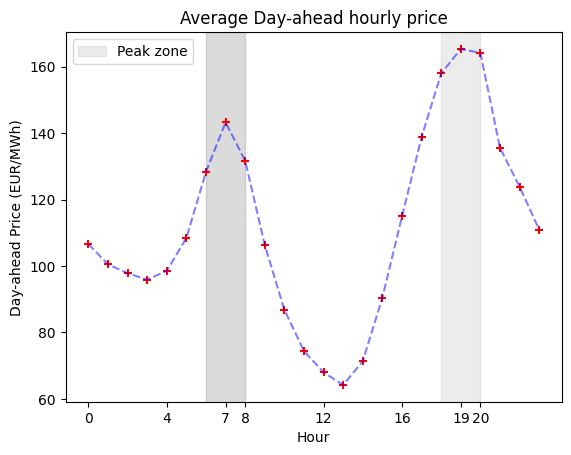

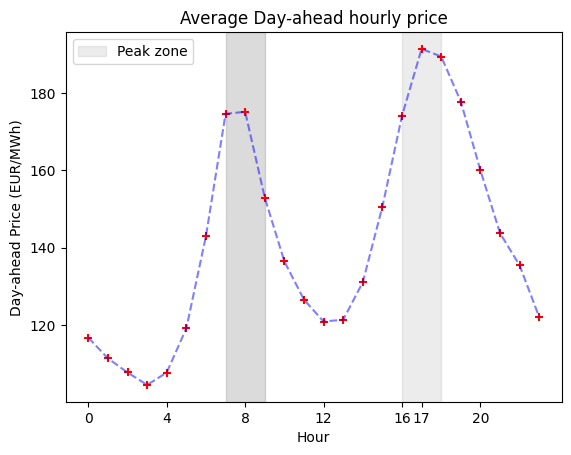

In [69]:
df = pd.read_csv('../data/clean_data.csv')
period = ('2025-01-02', '2025-05-26')
period1 = ('2025-01-02', '2025-02-26')
df['Date'] = pd.to_datetime(df['Date']).dt.date
plot_price_hour(df, period)
plot_price_hour(df, period1)

2022 OK


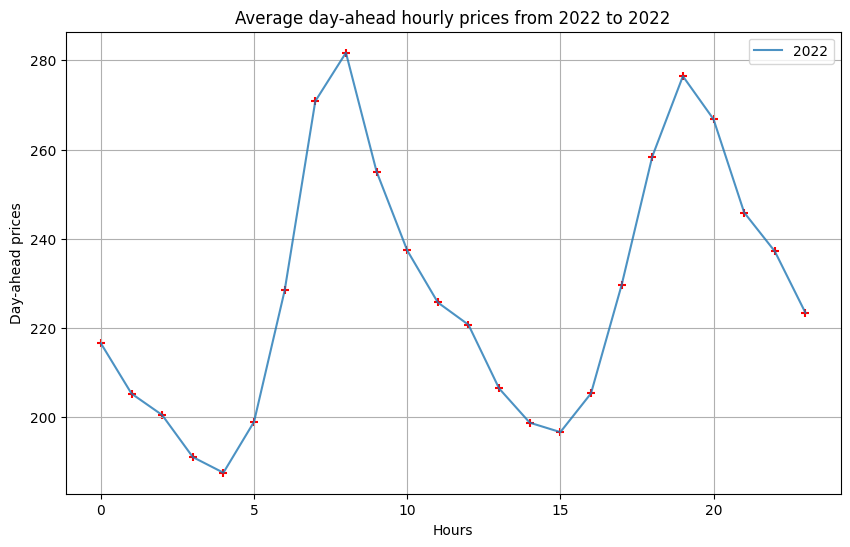

In [70]:
df = pd.read_csv('../data/clean/2022_prices_clean.csv')
period1 = ('01-02', '05-26')
df['Date'] = pd.to_datetime(df['Date']).dt.date
plot_avg_hourly_prices(df, 2022, 2022, period1)

2021 OK
2022 OK
2023 OK
2024 OK


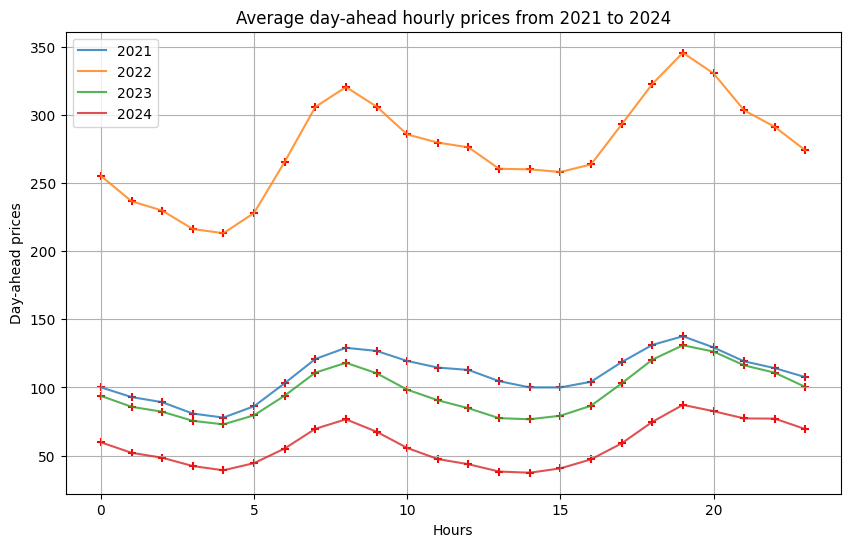

In [71]:
import pandas as pd
import os

# Define the folder where your CSV files are
folder_path = '../data/clean'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load and concatenate all CSVs
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)
df.to_csv("../data/2021-2024.csv", index=False)

period1 = ('01-01', '12-31')
df['Date'] = pd.to_datetime(df['Date']).dt.date
plot_avg_hourly_prices(df, 2021, 2024, period1)

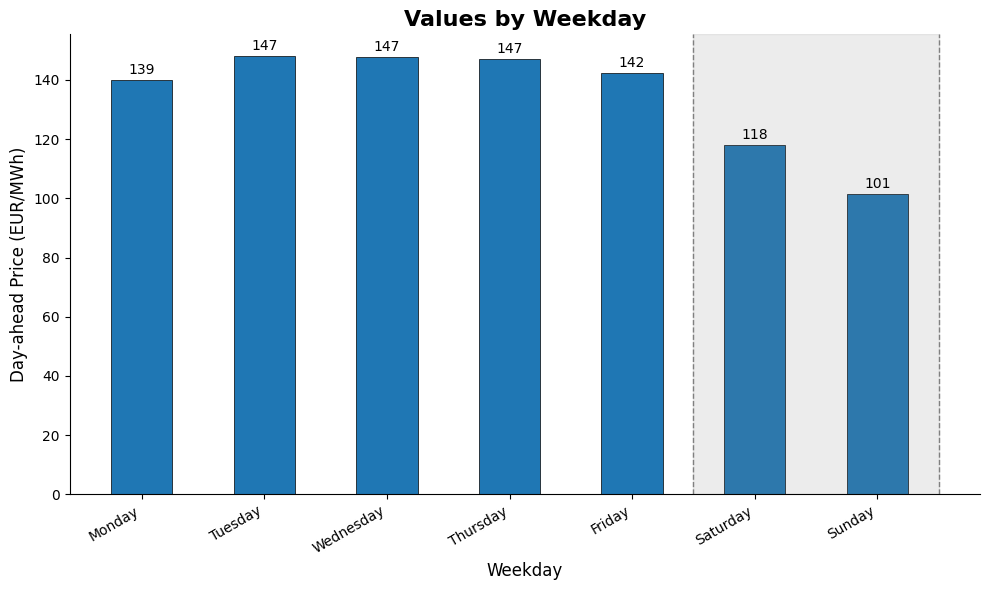

In [72]:
df_weekday = df.groupby('Weekday')['Day-ahead Price (EUR/MWh)'].mean().reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday['Weekday'] = pd.Categorical(df_weekday['Weekday'], categories=weekday_order, ordered=True)
df_weekday = df_weekday.sort_values('Weekday')

# plt.bar(df_weekday['Weekday'], df_weekday['Day-ahead Price (EUR/MWh)'])

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Choose a clean, soft color
bar_color = '#1f77b4'  # Blue from Matplotlib default palette
edge_color = 'black'

# Plot bars
bars = ax.bar(df_weekday['Weekday'], df_weekday['Day-ahead Price (EUR/MWh)'], width=0.5, color=bar_color, edgecolor=edge_color, linewidth=0.5)

# Add dotted vertical lines before Saturday and after Sunday
ax.axvline(x=4.5, color='gray', linestyle='--', linewidth=1)  # Between Friday and Saturday
ax.axvline(x=6.5, color='gray', linestyle='--', linewidth=1)  # After Sunday
ax.axvspan(4.5, 6.5, color='gray', alpha=0.15)

# Add data labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, int(height),
            ha='center', va='bottom', fontsize=10)

# Titles and labels
ax.set_title('Values by Weekday', fontsize=16, fontweight='bold')
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Day-ahead Price (EUR/MWh)', fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Make layout tighter
plt.tight_layout()

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)